###Exploratory Analysis of Geolocational Data

##Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import geopy
import scipy

##Data Collection

In [2]:
dataset = pd.read_csv('food_coded.csv')

In [3]:
dataset

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3.5,1,1,610,4.0,420.0,2,"wine. mac and cheese, pizza, ice cream",boredom and sadness,NaN,...,1.0,1.0,5,940.0,500,Softball,5,1,1315,156
121,3,1,1,265,2.0,315.0,2,Pizza / Wings / Cheesecake,Loneliness / Homesick / Sadness,NaN,...,1.0,NaN,4,940.0,500,basketball,5,2,1315,180
122,3.882,1,1,720,NaN,420.0,1,"rice, potato, seaweed soup",sadness,NaN,...,1.0,2.0,5,580.0,690,none,4,2,1315,120
123,3,2,1,720,4.0,420.0,1,"Mac n Cheese, Lasagna, Pizza","happiness, they are some of my favorite foods",NaN,...,2.0,2.0,1,940.0,500,NaN,3,1,1315,135


##Data Cleaning

In [4]:
dataset.columns

Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1',
       'cuisine', 'diet_current', 'diet_current_coded', 'drink',
       'eating_changes', 'eating_changes_coded', 'eating_changes_coded1',
       'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       

In [5]:
column=['cook','eating_out','employment','ethnic_food', 'exercise','fruit_day','income','on_off_campus','pay_meal_out','sports','veggies_day']

In [6]:
data=dataset[column]

In [14]:
data

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5
1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4
2,1.0,2,3.0,5,2.0,5,6.0,2.0,3,2.0,5
3,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3
4,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...
120,3.0,2,1.0,4,2.0,5,4.0,3.0,4,1.0,5
121,3.0,4,3.0,3,2.0,4,2.0,1.0,4,NaN,5
122,3.0,3,3.0,5,2.0,4,2.0,1.0,4,2.0,4
123,3.0,5,2.0,2,1.0,5,4.0,1.0,3,2.0,3


In [15]:
data.isnull().sum()

cook              3
eating_out        0
employment        9
ethnic_food       0
exercise         13
fruit_day         0
income            1
on_off_campus     1
pay_meal_out      0
sports            2
veggies_day       0
dtype: int64

In [18]:
d = data.dropna()

In [19]:
d.isnull().sum()

cook             0
eating_out       0
employment       0
ethnic_food      0
exercise         0
fruit_day        0
income           0
on_off_campus    0
pay_meal_out     0
sports           0
veggies_day      0
dtype: int64

##Data Exploration & Visualisation

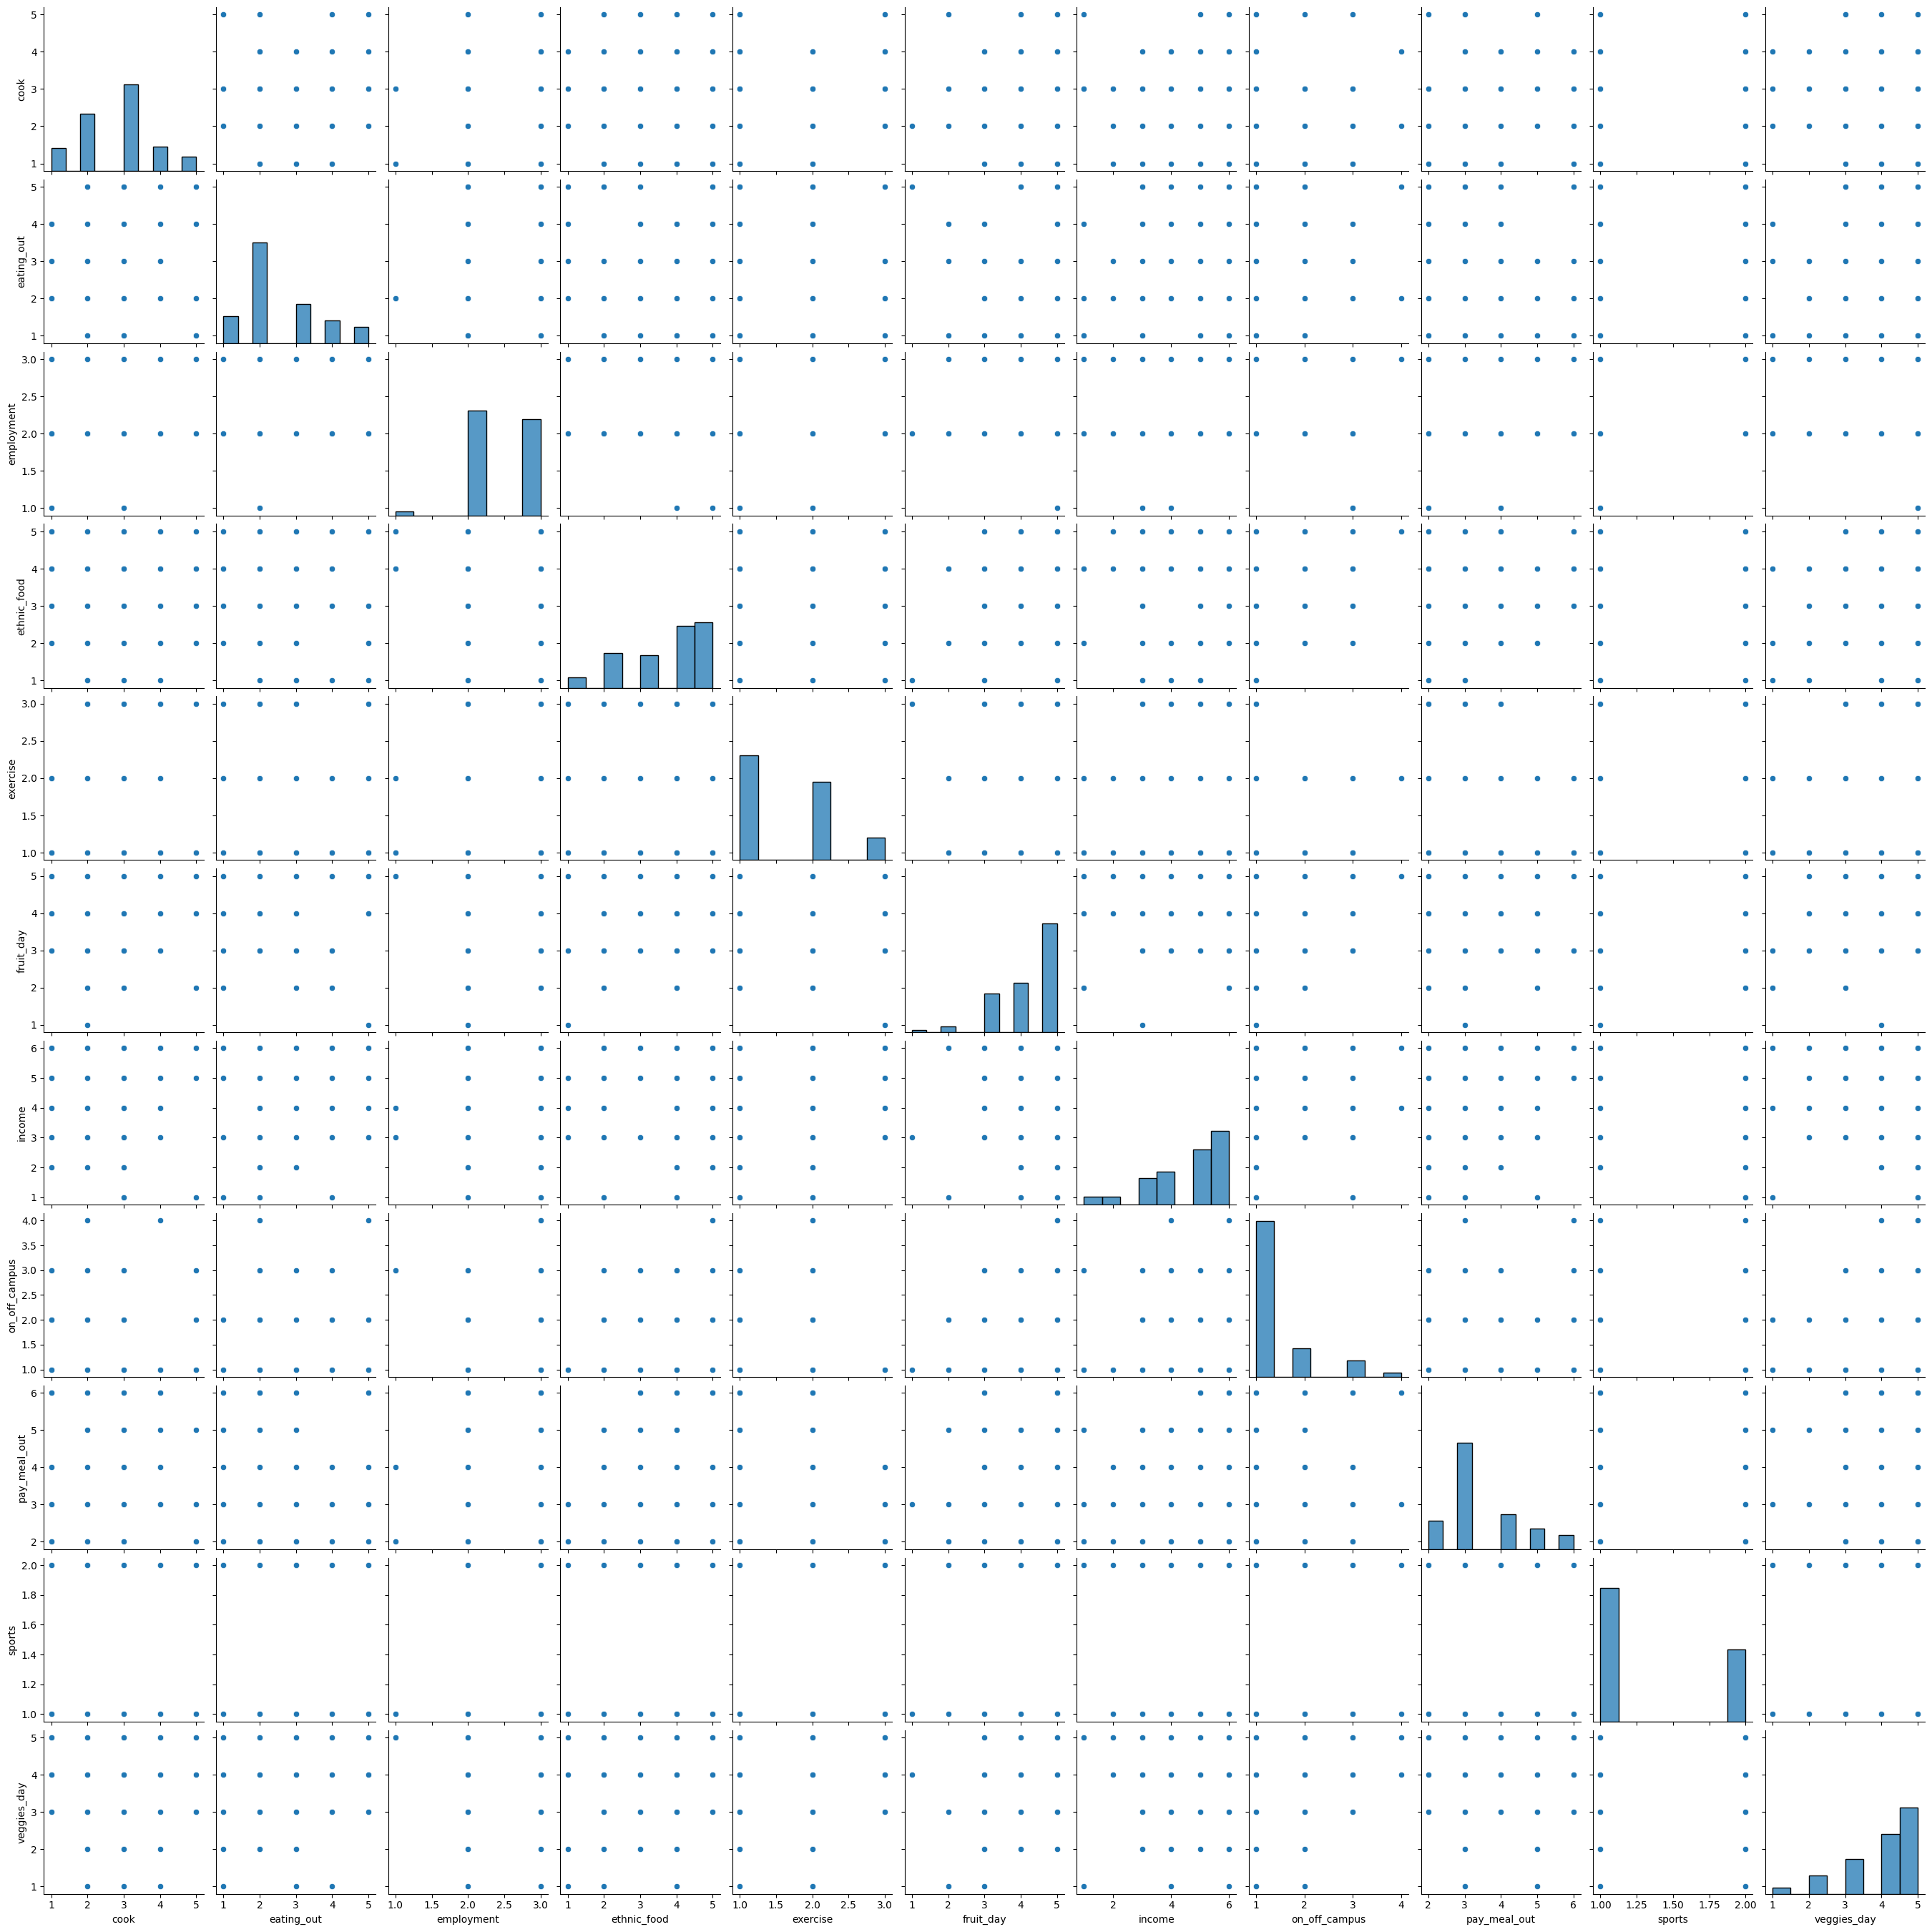

In [20]:
sns.pairplot(d)

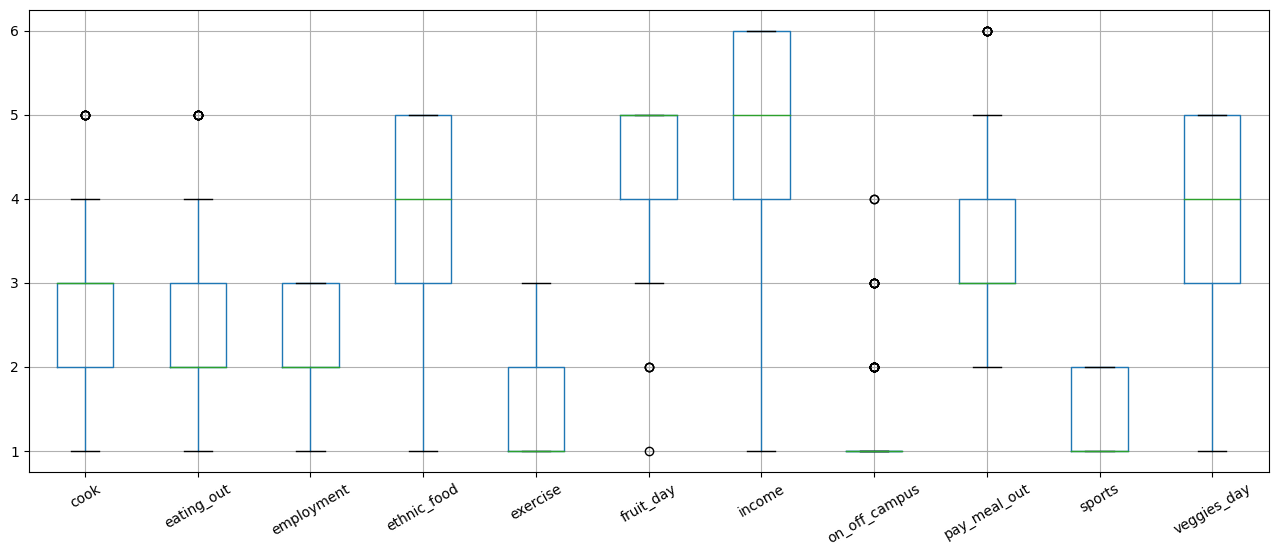

In [21]:
ax=d.boxplot(figsize=(16,6))
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

plt.show()

##K-Means Clustering on the Data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

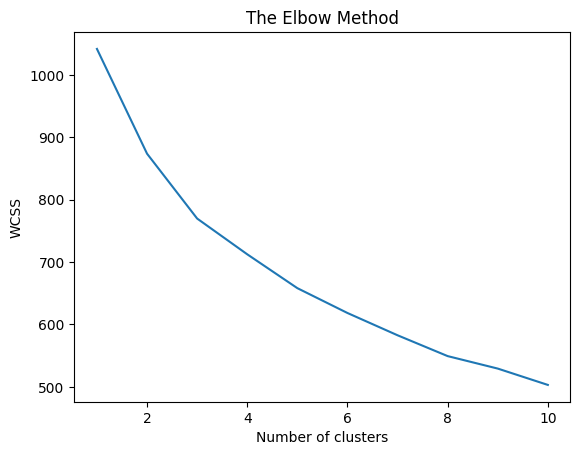

In [22]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(d)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

##Get the Geolocational Data

In [141]:
from pandas import json_normalize
import requests

In [62]:
url = "https://api.foursquare.com/v3/places/search?ll=17.448372,78.526957&radius=100000&limit=50"

headers = {
    "accept": "application/json",
    "Authorization": "fsq3qLLeRoH+eyh1xgPkIzv/u177uapp6U17LkIfm8ZjG1g="
}

response = requests.get(url, headers=headers)

In [63]:
results = response.json()

In [64]:
results

{'results': [{'fsq_id': '4f897568e4b0ab0c1b0793cd',
   'categories': [{'id': 12111,
     'name': 'Temple',
     'short_name': 'Temple',
     'plural_name': 'Temples',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/religious_temple_',
      'suffix': '.png'}}],
   'chains': [],
   'closed_bucket': 'LikelyOpen',
   'distance': 4336,
   'geocodes': {'main': {'latitude': 17.45771, 'longitude': 78.487291},
    'roof': {'latitude': 17.45771, 'longitude': 78.487291}},
   'link': '/v3/places/4f897568e4b0ab0c1b0793cd',
   'location': {'address': 'Tadbund',
    'country': 'IN',
    'cross_street': '',
    'formatted_address': 'Tadbund, 941735',
    'postcode': '941735'},
   'name': 'Tadbund Hanuman Temple',
   'related_places': {},
   'timezone': 'Asia/Kolkata'},
  {'fsq_id': '4c08f54f6071a5934901dd32',
   'categories': [{'id': 13016,
     'name': 'Lounge',
     'short_name': 'Lounge',
     'plural_name': 'Lounges',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/cate

In [81]:
venues = results['results']
nearby_venues = json_normalize(venues)

In [82]:
nearby_venues

,fsq_id,categories,chains,closed_bucket,distance,link,name,timezone,geocodes.main.latitude,geocodes.main.longitude,...,location.postcode,location.address_extended,location.locality,location.region,related_places.children,geocodes.drop_off.latitude,geocodes.drop_off.longitude,related_places.parent.fsq_id,related_places.parent.categories,related_places.parent.name
0,4f897568e4b0ab0c1b0793cd,"[{'id': 12111, 'name': 'Temple', 'short_name':...",[],LikelyOpen,4336,/v3/places/4f897568e4b0ab0c1b0793cd,Tadbund Hanuman Temple,Asia/Kolkata,17.457710,78.487291,...,941735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4c08f54f6071a5934901dd32,"[{'id': 13016, 'name': 'Lounge', 'short_name':...",[],LikelyOpen,7955,/v3/places/4c08f54f6071a5934901dd32,Nizam Club,Asia/Kolkata,17.364208,78.526788,...,500004,Opposite Assembly,Hyderabad,Telangana,[],NaN,NaN,NaN,NaN,NaN
2,4dc4a65e18506de4adc5d5e5,"[{'id': 13223, 'name': 'South Indian Restauran...",[],LikelyOpen,8275,/v3/places/4dc4a65e18506de4adc5d5e5,Pragati,Asia/Kolkata,17.388202,78.481173,...,NaN,NaN,Hyderabad,Telangana,NaN,NaN,NaN,NaN,NaN,NaN
3,4bdebd29be5120a17e98fe70,"[{'id': 13199, 'name': 'Indian Restaurant', 's...",[],LikelyOpen,7463,/v3/places/4bdebd29be5120a17e98fe70,Cafe Bahar,Asia/Kolkata,17.399844,78.478567,...,500029,NaN,Hyderabad,Telangana,NaN,NaN,NaN,NaN,NaN,NaN
4,4d5fadf029ef236a85a09b59,"[{'id': 13034, 'name': 'Café', 'short_name': '...",[],LikelyOpen,8682,/v3/places/4d5fadf029ef236a85a09b59,Cafe Niloufer and Bakers,Asia/Kolkata,17.399844,78.462948,...,500004,Opposite Hanuman Temple,Hyderabad,Telangana,NaN,17.399855,78.462831,NaN,NaN,NaN
5,4c680fe8e75ac9288aa2fbda,"[{'id': 13046, 'name': 'Ice Cream Parlor', 'sh...",[],LikelyOpen,11436,/v3/places/4c680fe8e75ac9288aa2fbda,Cream Stone Concepts,Asia/Kolkata,17.424985,78.421990,...,884127,NaN,Hyderabad,Telangana,NaN,NaN,NaN,NaN,NaN,NaN
6,4cc19bfb67a3b1f77a8dc90e,"[{'id': 10030, 'name': 'History Museum', 'shor...",[],LikelyOpen,11506,/v3/places/4cc19bfb67a3b1f77a8dc90e,Chowmahala Palace,Asia/Kolkata,17.359246,78.471719,...,NaN,NaN,Hyderabad,Telangana,NaN,NaN,NaN,NaN,NaN,NaN
7,549c1eaf498e5892fb58624f,"[{'id': 13199, 'name': 'Indian Restaurant', 's...",[],Unsure,12153,/v3/places/549c1eaf498e5892fb58624f,Sayala Drive In,Asia/Kolkata,17.434525,78.413207,...,500045,NaN,Hyderabad,Telangana,NaN,NaN,NaN,NaN,NaN,NaN
8,50df2d81e4b083ca6f3c12b5,"[{'id': 13009, 'name': 'Cocktail Bar', 'short_...",[],LikelyOpen,13691,/v3/places/50df2d81e4b083ca6f3c12b5,Over The Moon,Asia/Kolkata,17.436865,78.398272,...,500081,8th Floor,Hyderabad,Telangana,NaN,NaN,NaN,NaN,NaN,NaN
9,52411e2311d2bf60e0084ef5,"[{'id': 13026, 'name': 'BBQ Joint', 'short_nam...",[],Unsure,13720,/v3/places/52411e2311d2bf60e0084ef5,AB's - Absolute Barbecues,Asia/Kolkata,17.438328,78.397824,...,931735,"4th Floor, Near Madhapur Police Station, Road ...",Hyderabad,Telangana,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
city = "Hyderabad"
locator = geopy.geocoders.Nominatim(user_agent="MyCoder")
location = locator.geocode(city)
print(location)
location = [location.latitude, location.longitude]
print("[lat, long]:", location)

Hyderabad, Bahadurpura mandal, Hyderabad District, Telangana, India
[lat, long]: [17.360589, 78.4740613]


In [87]:
nearby_venues.columns

Index(['fsq_id', 'categories', 'chains', 'closed_bucket', 'distance', 'link',
       'name', 'timezone', 'geocodes.main.latitude', 'geocodes.main.longitude',
       'geocodes.roof.latitude', 'geocodes.roof.longitude', 'location.address',
       'location.country', 'location.cross_street',
       'location.formatted_address', 'location.postcode',
       'location.address_extended', 'location.locality', 'location.region',
       'related_places.children', 'geocodes.drop_off.latitude',
       'geocodes.drop_off.longitude', 'related_places.parent.fsq_id',
       'related_places.parent.categories', 'related_places.parent.name'],
      dtype='object')

In [90]:
import requests
from pandas import json_normalize

resta = []
oth = []

for lat, long in zip(nearby_venues['geocodes.main.latitude'], nearby_venues['geocodes.main.longitude']):
    url = f"https://api.foursquare.com/v3/places/search?ll={lat},{long}&radius=100000&limit=50"

    headers = {
        "accept": "application/json",
        "Authorization": "fsq3qLLeRoH+eyh1xgPkIzv/u177uapp6U17LkIfm8ZjG1g="
    }

    res = requests.get(url, headers=headers).json()
    venue = res.get('results', [])

    if venue:
        nearby_venue = json_normalize(venue)
        categories = nearby_venue['categories']

        count_restaurant = 0
        count_other = 0

        for category_list in categories:
            for category in category_list:
                if category.get('icon', {}).get('prefix', '').find('food') != -1:
                    count_restaurant += 1
                else:
                    count_other += 1

        resta.append(count_restaurant)
        oth.append(count_other)
    else:
        resta.append(0)
        oth.append(0)

nearby_venues['restaurant'] = resta
nearby_venues['others'] = oth

print(nearby_venues)


                      fsq_id  \
0   4f897568e4b0ab0c1b0793cd   
1   4c08f54f6071a5934901dd32   
2   4dc4a65e18506de4adc5d5e5   
3   4bdebd29be5120a17e98fe70   
4   4d5fadf029ef236a85a09b59   
5   4c680fe8e75ac9288aa2fbda   
6   4cc19bfb67a3b1f77a8dc90e   
7   549c1eaf498e5892fb58624f   
8   50df2d81e4b083ca6f3c12b5   
9   52411e2311d2bf60e0084ef5   
10  4d25d4d0f50aa35d33b6379f   
11  55980b94498ef5a26d8ade9c   
12  56b22b27498eb5612bf5ccc2   
13  4f922a07e4b07f2f7f594b91   
14  5226cb0811d272aec241a811   
15  56288c93498e0749c4c49145   
16  56b22ae0498e3b5919c58579   
17  61d9555887d0817284bbe6c6   
18  55aa5e72498eb193c52edca0   
19  616067c2d3e56e6d39bb0776   
20  60edd17235eaf81421193dba   
21  60ed39abc7da7e768c8c6ae3   
22  59abc99a3c858d09e39aebef   
23  61698262df30314922c701c4   
24  57937fd3498ebdaab9ffc14f   
25  4e6364bc52b1260c1387a75a   
26  58beb157730a927715e37cda   
27  57482287498e298f6ad8c5eb   
28  53d5dd94498efe63cb8f15b2   
29  94877c16874d496ba48929ec   
30  5d42

In [91]:
nearby_venues.columns

Index(['fsq_id', 'categories', 'chains', 'closed_bucket', 'distance', 'link',
       'name', 'timezone', 'geocodes.main.latitude', 'geocodes.main.longitude',
       'geocodes.roof.latitude', 'geocodes.roof.longitude', 'location.address',
       'location.country', 'location.cross_street',
       'location.formatted_address', 'location.postcode',
       'location.address_extended', 'location.locality', 'location.region',
       'related_places.children', 'geocodes.drop_off.latitude',
       'geocodes.drop_off.longitude', 'related_places.parent.fsq_id',
       'related_places.parent.categories', 'related_places.parent.name',
       'restaurant', 'others'],
      dtype='object')

##Data Cleaning Process

In [94]:
columns_to_drop = [
    'fsq_id', 'categories', 'chains', 'closed_bucket', 'distance', 'link',
    'name', 'timezone', 'geocodes.roof.latitude', 'geocodes.roof.longitude',
    'location.country', 'location.cross_street', 'location.formatted_address',
    'location.postcode', 'location.address_extended', 'location.locality',
    'location.region', 'related_places.children', 'geocodes.drop_off.latitude',
    'geocodes.drop_off.longitude', 'related_places.parent.fsq_id',
    'related_places.parent.categories', 'related_places.parent.name'
]

n = nearby_venues.drop(columns_to_drop, axis=1, errors='ignore')


In [95]:
n.columns

Index(['geocodes.main.latitude', 'geocodes.main.longitude', 'location.address',
       'restaurant', 'others'],
      dtype='object')

In [96]:
n.isnull().sum()

geocodes.main.latitude      0
geocodes.main.longitude     0
location.address           14
restaurant                  0
others                      0
dtype: int64

In [124]:
n.dropna()
n = n.rename(columns={'geocodes.main.latitude': 'lat', 'geocodes.main.longitude': 'long'})
n

,lat,long,location.address,restaurant,others
0,17.457710,78.487291,Tadbund,32,26
1,17.364208,78.526788,"5-9-5 .And 6, Saifabad Road, Saifabad",21,19
2,17.388202,78.481173,"Kandaswamy Lane, Sultan Bazaar, Koti",29,27
3,17.399844,78.478567,"Shop No. 3-5-815, Hyderguda Road, Old Mla Quar...",30,27
4,17.399844,78.462948,Red Hills Road,30,27
5,17.424985,78.421990,Banjara Hills,34,25
6,17.359246,78.471719,Moti Gali,30,27
7,17.434525,78.413207,"Jubilee Hills, Road 10",34,25
8,17.436865,78.398272,"Daspalla Hotel, Jubilee Hills",37,23
9,17.438328,78.397824,"Bajaj Electronics Building, Plot No. 483, Pemm...",37,23


In [98]:
n['location.address']

0                                               Tadbund
1                 5-9-5 .And 6, Saifabad Road, Saifabad
2                  Kandaswamy Lane, Sultan Bazaar, Koti
3     Shop No. 3-5-815, Hyderguda Road, Old Mla Quar...
4                                        Red Hills Road
5                                         Banjara Hills
6                                             Moti Gali
7                                Jubilee Hills, Road 10
8                         Daspalla Hotel, Jubilee Hills
9     Bajaj Electronics Building, Plot No. 483, Pemm...
10    Huda Techno Enclave, Raheja It Park, Hitech Ci...
11                   B 7 .And 8, Jubilee Garden, E Park
12                                                  NaN
13                                               Wargal
14                                                  NaN
15                                                  NaN
16                                                  NaN
17                                              

In [99]:
spec_chars = ["[","]"]
for char in spec_chars:
  n['location.address'] = n['location.address'].astype(str).str.replace(char, ' ')

In [101]:
n

,geocodes.main.latitude,geocodes.main.longitude,location.address,restaurant,others
0,17.457710,78.487291,Tadbund,32,26
1,17.364208,78.526788,"5-9-5 .And 6, Saifabad Road, Saifabad",21,19
2,17.388202,78.481173,"Kandaswamy Lane, Sultan Bazaar, Koti",29,27
3,17.399844,78.478567,"Shop No. 3-5-815, Hyderguda Road, Old Mla Quar...",30,27
4,17.399844,78.462948,Red Hills Road,30,27
5,17.424985,78.421990,Banjara Hills,34,25
6,17.359246,78.471719,Moti Gali,30,27
7,17.434525,78.413207,"Jubilee Hills, Road 10",34,25
8,17.436865,78.398272,"Daspalla Hotel, Jubilee Hills",37,23
9,17.438328,78.397824,"Bajaj Electronics Building, Plot No. 483, Pemm...",37,23


##Applying K-Means Clustering to the new data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

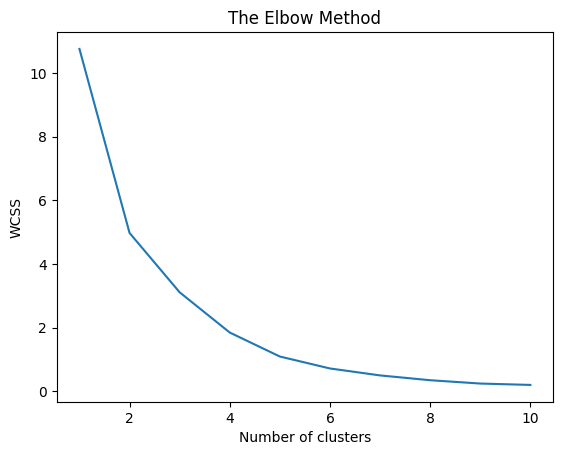

In [125]:
from sklearn.cluster import KMeans
wcss = []
lag_long = ['lat','long']
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(n[lag_long])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [126]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(n[lag_long])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [127]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 4, 4, 0, 0, 0, 4, 3, 3, 4, 4, 4, 2, 4], dtype=int32)

In [140]:
from sklearn import cluster, preprocessing

In [136]:
model = cluster.AffinityPropagation()

Text(0.5, 1.0, 'Clustering (k=6)')

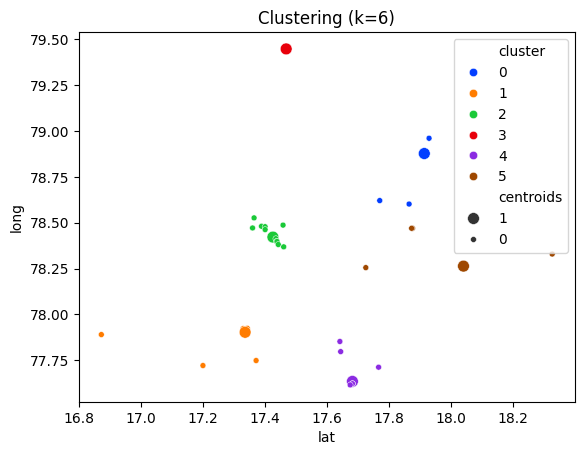

In [137]:
k = n["cluster"].nunique()
sns.scatterplot(x="lat", y="long", data=n,
                palette=sns.color_palette("bright",k),
                hue='cluster', size="centroids", size_order=[1,0],
                legend="brief").set_title('Clustering (k='+str(k)+')')

In [139]:

x, y = "lat", "long"
color = "cluster"
size = "restaurant"
popup = "location.address"
marker = "centroids"
data = n.copy()
## create color column
lst_elements = sorted(list(n[color].unique()))
lst_colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for i in
              range(len(lst_elements))]
data["color"] = data[color].apply(lambda x:
                lst_colors[lst_elements.index(x)])

scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)

map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=11)

data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]],
           color=row["color"], fill=True,popup=row[popup],
           radius=row["size"]).add_to(map_), axis=1)

legend_html = """ """+color+""":"""
for i in lst_elements:
     legend_html = legend_html+"""
      """+str(i)+""""""
legend_html = legend_html+""""""
map_.get_root().html.add_child(folium.Element(legend_html))

lst_elements = sorted(list(n[marker].unique()))
data[data[marker]==1].apply(lambda row:
           folium.Marker(location=[row[x],row[y]],
           draggable=False,  popup=row[popup] ,
           icon=folium.Icon(color="black")).add_to(map_), axis=1)
map_